# Bay Wheel Bikes (Ford GoBike) Usage Data Analysis
## by Yunhan Zhu

Sharing economy has been one of the biggest business innovations since the late 2000s. In this project, we aim to explore the usage behavior of bike sharing, based on the anonymous trip data of Bay Wheel bikes, the bike sharing service operated by Lyft. We will explore the dataset and summarize key findings. 

Introduction to datasets: We used the anonymous usage data of Ford GoBike/Bay Wheel Bike for this analysis. The original data was downloaded from Ford GoBike/Bay Wheel Bike website, giving us over 4 million bike share entries between June 2017 and October 2019. Each entry has 16 features, including bike id, bike_share_for_all_trip, duration by second, start & end station details (id, longitude, latitude, station name), start & end time, member details (birth year, gender), and user type. Some features are numerical (such as duration), but most others are categorical.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import datetime
import math
import calendar

### Gather data 
1. download files from given url
2. merge the file into one single dataframe
3. save the dataframe into a csv file

In [2]:
# download files from given url

# directory for the files 
folder_name = 'raw_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# get 2017 data 
pd.read_csv('https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name))

In [5]:
urls = []
#2018 urls
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(bike_data_url)

#201901-05 urls
for month in range(1,5):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    urls.append(bike_data_url)

# 201905-10 urls
for month in range(5,11):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_leading_zero + '-baywheels-tripdata.csv.zip'
    urls.append(bike_data_url)

In [6]:
# get csv file from the zip file url 
for url in urls:
    response = get(url)      
    unzipped_file = ZipFile(BytesIO(response.content))
    unzipped_file.extractall(folder_name)

In [7]:
# list of csvs 
list_csvs = []

for trip_data in glob.glob('raw_files/*.csv'):
    trips = pd.read_csv(trip_data)
    if trips.shape[1]<10:
        trips = pd.read_csv(trip_data, sep=';')
    list_csvs.append(trips)

# put the csvs into a dataframe 
df_master = pd.concat(list_csvs)

C:\Users\yunhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yunhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554806 entries, 0 to 239894
Data columns (total 18 columns):
Unnamed: 0                 float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(2), object(8)
memory usage: 660.3+ MB


In [9]:
df_master.to_csv('master.csv')

### Assess data  

issue identified - unnamed column 0 is not part of the attributes in the description

In [10]:
# make a copy of df_master for data cleaning
df_copy=df_master.copy()

In [11]:
# check duplicates
df_copy.duplicated().sum()

0

In [12]:
df_copy.member_birth_year.value_counts().index

Float64Index([1988.0, 1989.0, 1990.0, 1987.0, 1991.0, 1993.0, 1985.0, 1986.0,
              1992.0, 1984.0, 1994.0, 1983.0, 1995.0, 1982.0, 1980.0, 1981.0,
              1996.0, 1979.0, 1977.0, 1978.0, 1975.0, 1997.0, 1974.0, 1976.0,
              1973.0, 1998.0, 1971.0, 1968.0, 1972.0, 1965.0, 1970.0, 1969.0,
              1967.0, 1999.0, 1963.0, 1964.0, 1966.0, 1962.0, 1961.0, 1960.0,
              2000.0, 1959.0, 1958.0, 1957.0, 1956.0, 1954.0, 1955.0, 1952.0,
              1950.0, 1953.0, 1951.0, 1949.0, 1947.0, 1945.0, 2001.0, 1948.0,
              1900.0, 1943.0, 1931.0, 1942.0, 1944.0, 1946.0, 1902.0, 1935.0,
              1933.0, 1941.0, 1936.0, 1911.0, 1924.0, 1920.0, 1939.0, 1934.0,
              1896.0, 1938.0, 1940.0, 1901.0, 1928.0, 1890.0, 1932.0, 1904.0,
              1927.0, 1889.0, 1888.0, 1914.0, 1899.0, 1878.0, 1907.0, 1895.0,
              1923.0, 1881.0, 1909.0, 1930.0, 1886.0, 1906.0, 1903.0, 1910.0,
              1919.0],
             dtype='float64')

Quality issue identified - birth year should be bigger than 1919, assuming people in general are less than 100 years old 

In [13]:
df_copy.member_gender.value_counts().index

Index(['Male', 'Female', 'Other', 'M', 'F', '?', 'O'], dtype='object')

In [14]:
df_copy.member_gender.value_counts()

Male      3012602
Female     976829
Other       65956
M           53018
F           13446
?           12766
O            1173
Name: member_gender, dtype: int64

Three data quality issue identified - 
1. M and F should be changed to 'Male' and 'Female' respectively to make the variable name synchronized
2. Other, ?, and O are invalid gender types. Should be updated to 'NaN'
3. data type should be category 

In [15]:
df_copy.rental_access_method.value_counts()

app        82832
clipper     8915
Name: rental_access_method, dtype: int64

quality issue identified - only a very small number of entries (90k vs 4mn+) have rental access method. Therefore, we should drop this column

In [16]:
df_copy.start_time.sample(10)

249718    2019-03-01 17:38:49.4070
117237    2019-01-15 09:02:06.8470
80424     2018-09-18 16:44:55.7580
77863     2018-10-19 10:34:03.0800
36407     2019-07-25 07:13:23.2020
86545     2017-11-30 23:55:45.6220
48131     2018-08-23 21:23:03.0920
133790    2018-09-10 17:03:24.7660
19903     2018-04-26 19:04:16.0770
144653    2017-11-11 10:28:03.0520
Name: start_time, dtype: object

In [17]:
df_copy.end_time.sample(10)

250673         2019-07-21 10:14:28
18439     2019-07-29 08:48:10.7920
28544     2018-08-27 18:48:23.4410
15571     2018-03-28 15:00:49.6560
72968     2019-04-19 09:27:49.1030
35467     2019-08-27 06:50:49.7260
467548    2017-08-03 09:07:24.7500
176585    2018-08-03 08:42:50.4740
36629     2018-10-25 21:00:24.3930
72846     2018-01-10 10:26:35.4690
Name: end_time, dtype: object

quality issue identified - time should be timestamps

In [18]:
df_copy.start_station_latitude.sample(10)

146098    37.759210
110844    37.337038
37080     37.804562
133767    37.792251
125203    37.783899
245183    37.777547
39408     37.769218
226887    37.783172
62945     37.789625
182172    37.804562
Name: start_station_latitude, dtype: float64

In [19]:
df_copy.bike_share_for_all_trip.value_counts()

No     3617251
Yes     326108
Name: bike_share_for_all_trip, dtype: int64

quality issue identified - type should be category 

In [20]:
df_copy.user_type.value_counts()

Subscriber    3792052
Customer       762754
Name: user_type, dtype: int64

quality issue identified - type should be category 

In [21]:
df_copy.bike_share_for_all_trip.value_counts()

No     3617251
Yes     326108
Name: bike_share_for_all_trip, dtype: int64

### Clean data 

Issues identified 
1. unnamed columns 0 is redundant column
2. only less than 3% of data have rental access method attribute. not meaningful.
2. in member birth year, birth year should be bigger than 1919, assuming people in general are less than 100 years old
3. in member gender, M and F should be changed to 'Male' and 'Female' respectively to make the variable name synchronized
4. in member gender, Other, ?, and O are invalid gender types. Should be updated to 'NaN'
5. in member gender, data type should be category 
6. start and end time should be timestamps
7. bike_share_for_all_trip, user_type data type should be category 

Define: unnamed columns 0, and rental_access_method are redundant columns

Solution: drop those columns

Test: see if the columns are dropped

In [22]:
df_copy.drop(['Unnamed: 0','rental_access_method'],axis=1,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554806 entries, 0 to 239894
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 590.8+ MB


Define: in member birth year, birth year should be bigger than 1919, assuming people in general are less than 100 years old

Solution: set birth year to None for birth years smaller than 1919

Test: see values are updated

In [23]:
df_copy.loc[(df_copy.member_birth_year < 1919),'member_birth_year']=np.nan 
df_copy.query('member_birth_year < 1919', inplace=False)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type


In [24]:
df_copy.member_birth_year.value_counts().index

Float64Index([1988.0, 1989.0, 1990.0, 1987.0, 1991.0, 1993.0, 1985.0, 1986.0,
              1992.0, 1984.0, 1994.0, 1983.0, 1995.0, 1982.0, 1980.0, 1981.0,
              1996.0, 1979.0, 1977.0, 1978.0, 1975.0, 1997.0, 1974.0, 1976.0,
              1973.0, 1998.0, 1971.0, 1968.0, 1972.0, 1965.0, 1970.0, 1969.0,
              1967.0, 1999.0, 1963.0, 1964.0, 1966.0, 1962.0, 1961.0, 1960.0,
              2000.0, 1959.0, 1958.0, 1957.0, 1956.0, 1954.0, 1955.0, 1952.0,
              1950.0, 1953.0, 1951.0, 1949.0, 1947.0, 1945.0, 2001.0, 1948.0,
              1943.0, 1931.0, 1942.0, 1944.0, 1946.0, 1935.0, 1933.0, 1941.0,
              1936.0, 1924.0, 1920.0, 1939.0, 1934.0, 1938.0, 1940.0, 1928.0,
              1932.0, 1927.0, 1923.0, 1930.0, 1919.0],
             dtype='float64')

Define: in member gender, M and F should be changed to 'Male' and 'Female' respectively to make the variable name synchronized; Other, ?, and O are invalid gender types. Should be updated to 'None'

Solution: make those changes

Test: see if the changes have been applied

In [25]:
df_copy.loc[(df_copy.member_gender == 'M'), 'member_gender'] = 'Male'
df_copy.loc[(df_copy.member_gender == 'F'), 'member_gender'] = 'Female'
df_copy.loc[(df_copy.member_gender == 'Other'), 'member_gender'] = None 
df_copy.loc[(df_copy.member_gender == 'O'), 'member_gender'] = None 
df_copy.loc[(df_copy.member_gender == '?'), 'member_gender'] = None 

df_copy.member_gender.value_counts()

Male      3065620
Female     990275
Name: member_gender, dtype: int64

Define: data types are incorrect for member_gender, start_time, end_time, bike_share_for_all_trip, user_type

Solution:
1. change member_gender, bike_share_for_all_trip, user_type datatype to category 
2. change start_time, end_time datatype to timestamp 

Test: see if the datatypes are updated

In [26]:
df_copy.member_gender = df_copy.member_gender.astype('category')
df_copy.bike_share_for_all_trip = df_copy.bike_share_for_all_trip.astype('category')
df_copy.user_type = df_copy.user_type.astype('category')

df_copy.start_time = pd.to_datetime(df_copy.start_time)
df_copy.end_time = pd.to_datetime(df_copy.end_time)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554806 entries, 0 to 239894
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 499.5+ MB


### What is the structure of your dataset?

There are over 4mn bike share rides in the dataset with 16 features, including bike id, bike_share_for_all_trip, duration by second, start & end station details (id, longitude, latitude, station name), start & end time, member details (birth year, gender), and user type. Some features are numerical (such as duration), but most others are categorical. 

### What is/are the main feature(s) of interest in your dataset?

My main interest lies in the usage behavior, including
1. How usage has changed over time 
2. Any difference by gender, user type, age group, time of the day, and days of the weeK
3. What are the popular duration and distance for bike share 
4. How do people use bike share, i.e. do people ususally use bike share for whole trip or only part of the trip


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. add a new column for duration in minute for ease of understanding 
2. need to add a column for distance
3. need to add a column for age
4. split out start hour, day of the week, year month from start time
5. filter out the entries that are missing details, e.g. bike_share_for_all_trip or if user_type = subscriber but missing member gender 

In [27]:
# add a column for duration in minute 
df_copy['duration_min'] = df_copy['duration_sec']/60

In [28]:
# add a formula for extracting distance in km based on longitude and latitude 

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [29]:
# add a new column for distance in km
df_copy['distance_km']= df_copy.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [30]:
# add a column for year month 
df_copy['year_month']=df_copy['start_time'].map(lambda x: x.strftime('%Y-%m'))

In [31]:
# add column for day of the week 
df_copy['weekday']=df_copy['start_time'].dt.strftime('%a')

In [32]:
# add column for hour of the day 
df_copy['start_hour']=df_copy['start_time'].dt.hour

In [35]:
df_copy['start_year'] = df_copy['start_time'].apply(lambda x: x.year)

In [37]:
# filter out the entries that are missing details, such as subcriber but missing gender or birth year
df_copy=df_copy[df_copy['bike_share_for_all_trip'].notnull()]
df_customer = df_copy[df_copy['user_type']=='Customer']
df_subscriber = df_copy[((df_copy['user_type']=='Subscriber') & (df_copy['member_gender'].notnull())) & (df_copy['member_birth_year'].notnull()) ]

In [38]:
# add an age column for subscribers
df_subscriber['member_age'] = df_subscriber['start_year'] - df_subscriber['member_birth_year']

C:\Users\yunhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df_new = pd.concat([df_customer, df_subscriber])
df_new.drop('start_year',axis=1,inplace=True)

In [40]:
# check if any subscriber missing gender or age details 
df_new[((df_new['user_type']=='Subscriber') & (df_new['member_gender'].isnull())) & (df_new['member_age'].isnull()) ]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,duration_min,distance_km,year_month,weekday,start_hour,member_age


In [82]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820917 entries, 1 to 239894
Data columns (total 22 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
duration_min               float64
distance_km                float64
year_month                 object
weekday                    object
start_hour                 int64
member_age                 float64
dtypes: category(3), datetime64[ns](2), float64(10), int64(3), object(4)
memory usage: 594.0+ MB


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [83]:
# get a subset of the dataframe with the above columns
subset = df_new[['bike_share_for_all_trip', 'member_gender', 
                  'user_type', 'member_age', 'duration_min', 
                  'distance_km', 'start_hour', 'weekday', 'start_time','year_month']].copy()

##### Check the bike_share_for_all_trip pattern

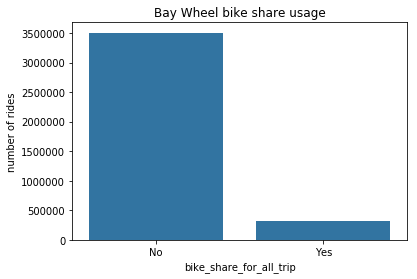

In [76]:
base_color = sb.color_palette()[0]

# see how bike share fits into people's trip arrangement
sb.countplot(data=subset, x='bike_share_for_all_trip',color=base_color)
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Finding: in most cases, people only use Bay Wheel Bikes for part of the trip. They rarely use bike share for the entire trip

##### Check the user type distribution 

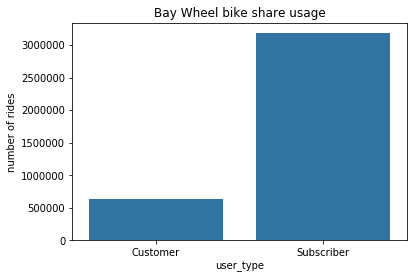

In [77]:
# see user type distribution 
sb.countplot(data = subset, x = 'user_type', color = base_color)
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Finding: most Bay Wheel bike trips were made by subscribers

##### Check the member gender distribution 

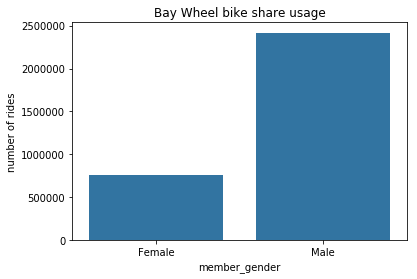

In [78]:
# see the gender distribution of members

# create two df for member and customer, respectively
subset_member = subset[subset['user_type']=='Subscriber']
subset_customer = subset[subset['user_type']=='Customer']

sb.countplot(data=subset_member, x='member_gender',color=base_color)
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Finding: more guys subscribe to Bay Wheel Bikes than women. 

##### Check popular age group for bike sharing

In [79]:
# age distribution 
# first look at the data via .describe()
subset_member.member_age.describe()

count    3.179977e+06
mean     3.467110e+01
std      1.018812e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      4.000000e+01
max      9.900000e+01
Name: member_age, dtype: float64

This shows min. member age is 18

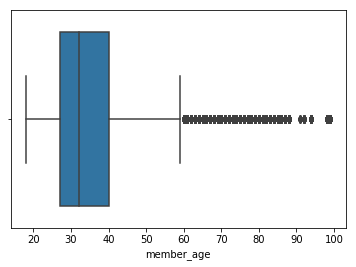

In [80]:
# plot a box plot on entire data
sb.boxplot(data=subset_member, x='member_age');

This shows most of the member age is lower than 60.

We can drop the entries where member age is larger than 60

In [86]:
subset_member = subset_member[subset_member.member_age <= 60]
subset = pd.concat([subset_member, subset_customer])

(18, 60)

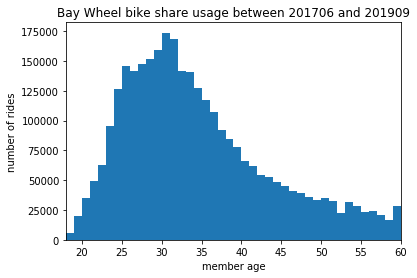

In [85]:
# draw a histogram distribution between 18 and 60
bin_edges = np.arange(18, 61, 1)
plt.hist(data = subset, x = 'member_age', bins = bin_edges);
plt.xlabel('member age')
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage between 201706 and 201909');
plt.xlim(18,60)

Finding: Bay Wheel Bikes are more popular between the 25-35 age group.

##### Check bike sharing usage by distance

In [88]:
subset.distance_km.describe()

count    3.753978e+06
mean     1.748943e+00
std      3.617807e+01
min      0.000000e+00
25%      8.984578e-01
50%      1.413393e+00
75%      2.167516e+00
max      1.279835e+04
Name: distance_km, dtype: float64

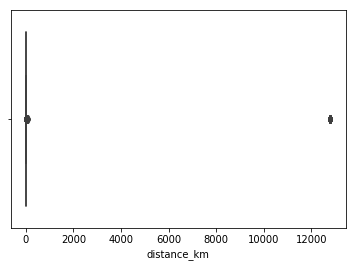

In [89]:
# plot a box plot on entire data
sb.boxplot(data=subset, x='distance_km');

The extremely high distance number seems to be an outlier. The describe.() also shows that 75% of rides have distance below 3km. Let's explore further

In [90]:
subset.query('distance_km > 5').count()[0]/subset.count()[0]

0.0091494942165351

As the ratio of long bike trips (distance > 5km) is less than 1%, we decided to drop those entries to make our data cleaner

In [91]:
subset.query('distance_km == 0').count()[0]/subset.count()[0]

0.0275635605749421

We also find out that some trips have 0 distance - these are not trip per se and should be dropped 

In [92]:
subset = subset[(subset.distance_km<5) & (subset.distance_km>0)]

(0, 5)

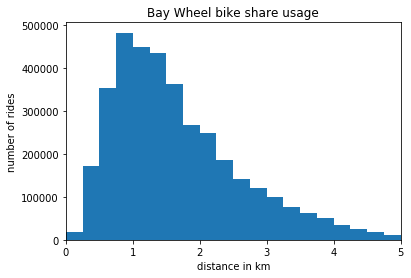

In [93]:
# draw a histogram on distance
bin_edges = np.arange(0, 5+0.25, 0.25)
plt.hist(data = subset, x = 'distance_km', bins = bin_edges);
plt.xlabel('distance in km')
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');
plt.xlim(0,5)

Findings: most trips are between 0.5-2km.

##### Check usage by duration

In [94]:
subset.duration_min.describe()

count    3.616158e+06
mean     1.304797e+01
std      3.324704e+01
min      1.016667e+00
25%      5.883333e+00
50%      9.250000e+00
75%      1.418333e+01
max      1.438017e+03
Name: duration_min, dtype: float64

Min duration is 1min. Duration for 75% of rides are shorter than 13 mins.

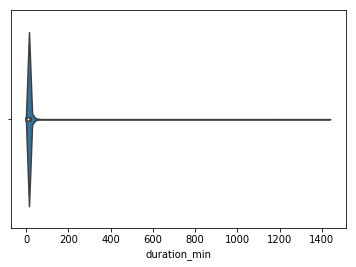

In [58]:
# plot a box plot on entire data
sb.violinplot(data=subset, x='duration_min',color=base_color);

In [95]:
# we check how many trips have duration longer than 30 mins
subset.query('duration_min > 30').count()[0]/subset.count()[0]

0.03769166059668853

As only a small percentage of the trips are longer than 30 mins, we decide to focus on the rides within 30 mins for our study

In [96]:
subset = subset[subset.duration_min <= 30]

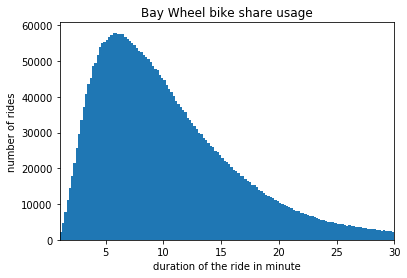

In [97]:
bin_edges = np.arange(1, 30.2, 0.2)
plt.hist(data = subset, x = 'duration_min', bins = bin_edges);
plt.xlabel('duration of the ride in minute');
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');
plt.xlim(1,30);

Findings: most of the rides are within 15 mins.

##### Check usage by start hour

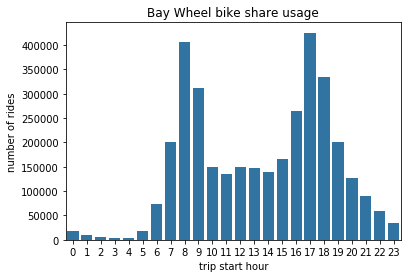

In [98]:
sb.countplot(data=subset, x='start_hour',color=base_color);
plt.xlabel('trip start hour');
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Finding: 7-9am and 4-7pm are two peak periods for bike sharing

##### Check usage by week of the day

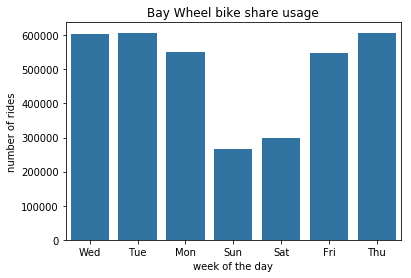

In [99]:
sb.countplot(data=subset, x='weekday',color=base_color);
plt.xlabel('week of the day');
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Findings: weekdays saw more usage than weekends

In [100]:
# as the five weekdays and two weekends offer similar bahaviour, we decide to add one column called weekday_type
subset.loc[(subset.weekday == 'Mon'), 'weekday_type'] = 'weekday'
subset.loc[(subset.weekday == 'Tue'), 'weekday_type'] = 'weekday'
subset.loc[(subset.weekday == 'Wed'), 'weekday_type'] = 'weekday'
subset.loc[(subset.weekday == 'Thu'), 'weekday_type'] = 'weekday'
subset.loc[(subset.weekday == 'Fri'), 'weekday_type'] = 'weekday'
subset.loc[(subset.weekday == 'Sat'), 'weekday_type'] = 'weekend'
subset.loc[(subset.weekday == 'Sun'), 'weekday_type'] = 'weekend'

subset.weekday_type = subset.weekday_type.astype('category')
# check if the changes have been made
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479859 entries, 6 to 239890
Data columns (total 11 columns):
bike_share_for_all_trip    category
member_gender              category
user_type                  category
member_age                 float64
duration_min               float64
distance_km                float64
start_hour                 int64
weekday                    object
start_time                 datetime64[ns]
year_month                 object
weekday_type               category
dtypes: category(4), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 265.7+ MB


##### Check usage by year_month

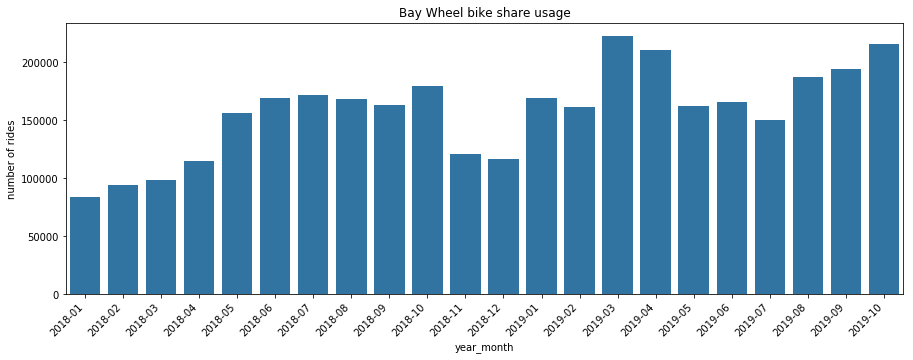

In [101]:
plt.figure(figsize=(15,5))
p = sb.countplot(data=subset.sort_values(by=['year_month']), x='year_month',color=base_color);
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('year_month');
plt.ylabel('number of rides');
plt.title('Bay Wheel bike share usage');

Finding: usage has improved steadily over time. Usage dropped YoY and MoM during the three months between May and July 2019, although that has started to recover from Aug 2019.

In [102]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479859 entries, 6 to 239890
Data columns (total 11 columns):
bike_share_for_all_trip    category
member_gender              category
user_type                  category
member_age                 float64
duration_min               float64
distance_km                float64
start_hour                 int64
weekday                    object
start_time                 datetime64[ns]
year_month                 object
weekday_type               category
dtypes: category(4), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 265.7+ MB


In [103]:
# save the subset into a csv file 
subset.to_csv('clean.csv')

### Discuss the distribution(s) of your variable(s) of interest. 

Findings:  
1. Usage has improved steadily over time. Usage dropped YoY and MoM during the three months between May and July 2019, although that has started to recover from Aug 2019.
2. Most Bay Wheel bike trips were made by subscribers as part of the whole trip. Within the subscribers, there are more men than women, and most of the subscribers fall between 25-35 years old. 
3. Most rides are between 0.5-2km, within 15 minutes.
4. 7-9am and 4-6pm are two peak periods for bike sharing, and weekdays saw more usage than weekends. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When I look at the distance distribution, I find that there are a very small percentage of entries with 0 or etremely long distance. I filtered out those outliers.

Also, with duration, there are a few outliers with extremely long duration. These entries are also filtered out.

The other thing I find is that, once I filter out the entries with missing details (e.g. bike share for all, or subscriber but missing gender), all entries prior to 2018 are removed. This probably makes sense - Bay Wheel was launched in June 2017, and at the initial stage, probably the data gathering process was a bit different from subsequent periods. That said, even after the cleaning, we still have over 3 million data entries to analyze, so that isn't a bad change after all. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [104]:
# change weekday and start_hour to category type
subset['start_hour']=subset['start_hour'].astype('category')
subset['weekday']=subset['weekday'].astype('category')

###### Check pairwise correlation between different variables

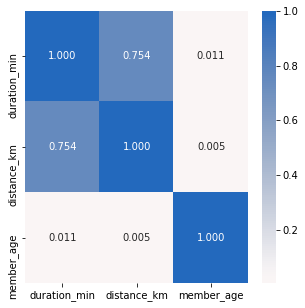

In [105]:
numeric_vars = ['duration_min','distance_km','member_age']

plt.figure(figsize=[5,5])
sb.heatmap(subset[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\yunhan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\yunhan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yunhan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


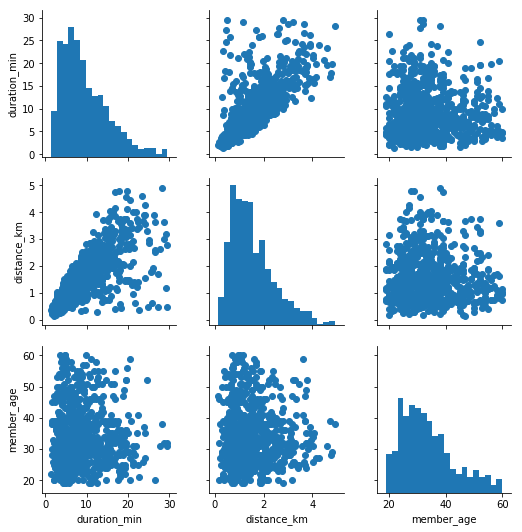

In [106]:
# plot matrix: sample 1000 rides so that plots are clearer
samples = np.random.choice(subset.shape[0],1000,replace=False)
subset_samp = subset.loc[samples,:]

g = sb.PairGrid(data = subset_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, duration and distance are highly correlated with each other. On the other hand, member age has less correlation with either duration or distance. 

##### Plot matrix of distance and duration against generic categorical features

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 360x360 with 0 Axes>

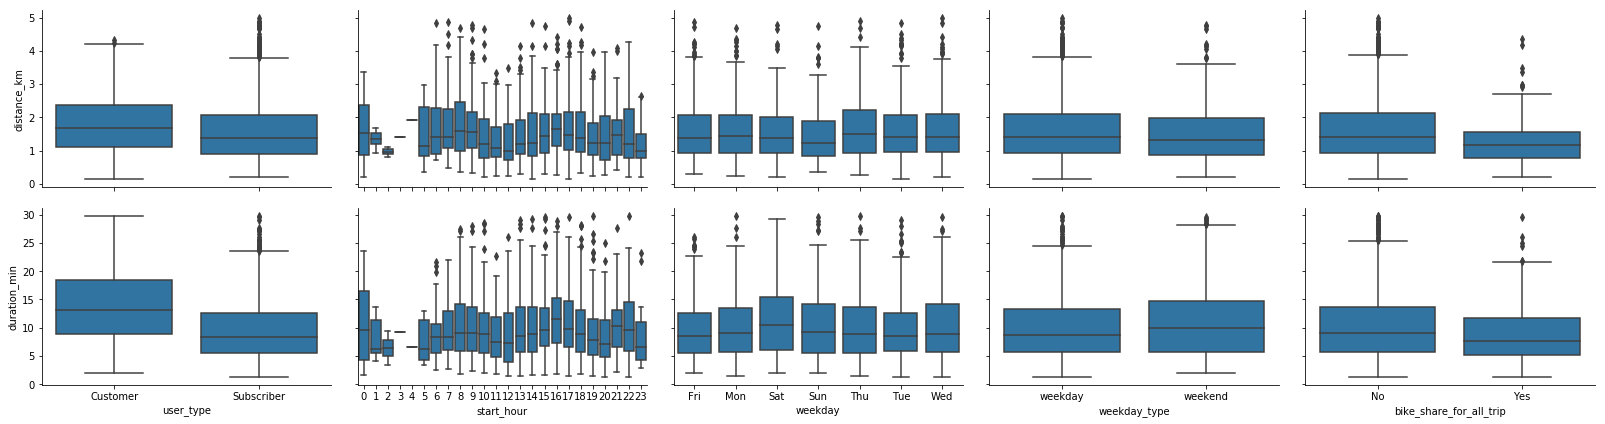

In [107]:
samples = np.random.choice(subset.shape[0], 2000, replace = False)
subset_samp = subset.loc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [5, 5])
g = sb.PairGrid(data = subset_samp, y_vars = ['distance_km', 'duration_min'], x_vars = ['user_type','start_hour','weekday','weekday_type','bike_share_for_all_trip'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

It shows that user_type, start_hour, and bike_share_for_all_trip all have obvious impact on duration and distance. 

Weekday type has an impact on duration but limited impact on distance. This is possible - people might ride slower (more casually over weekend)

##### Plot of member_gender vs distance and duration

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


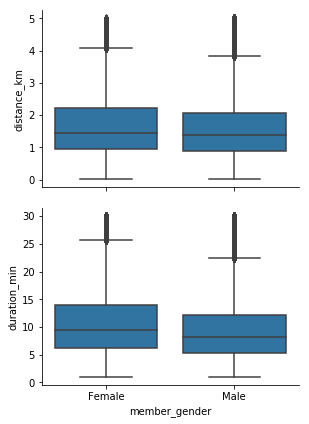

In [110]:
subset_member = subset[subset['user_type']=='Subscriber']
member_samples = np.random.choice(subset_member.shape[0], 2000, replace = False)
subset_member_samp = subset_member.loc[member_samples,:]

g = sb.PairGrid(data = subset_member, y_vars = ['distance_km', 'duration_min'], x_vars = 'member_gender', size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Finding: this shows males and females cycle similar distances, but females on average takes longer time with more variation in duration. This is understandable - men are generally more athletic than women. 

##### Plot matrix of member_age against categorical features
only member type will be selected 

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 360x360 with 0 Axes>

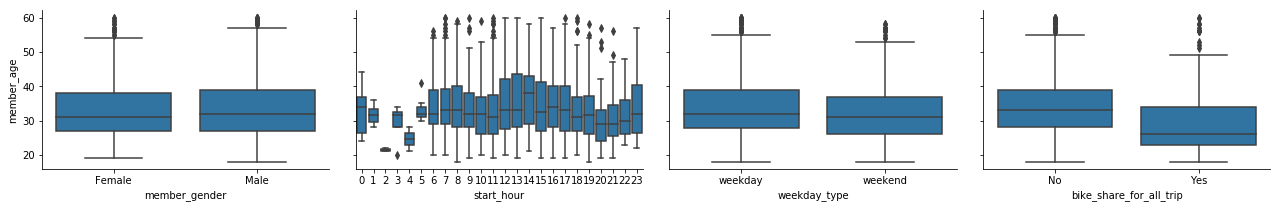

In [111]:
plt.figure(figsize = [5, 5])
g = sb.PairGrid(data = subset_member_samp, y_vars = ['member_age'], x_vars = ['member_gender','start_hour','weekday_type','bike_share_for_all_trip'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

It shows start_hour, bike_share_for_all_trip, and weekday type have more obvious impact on member age. Gender also has some impact on member age, although the magnitude is smaller.

##### Relationship across the categorical categories

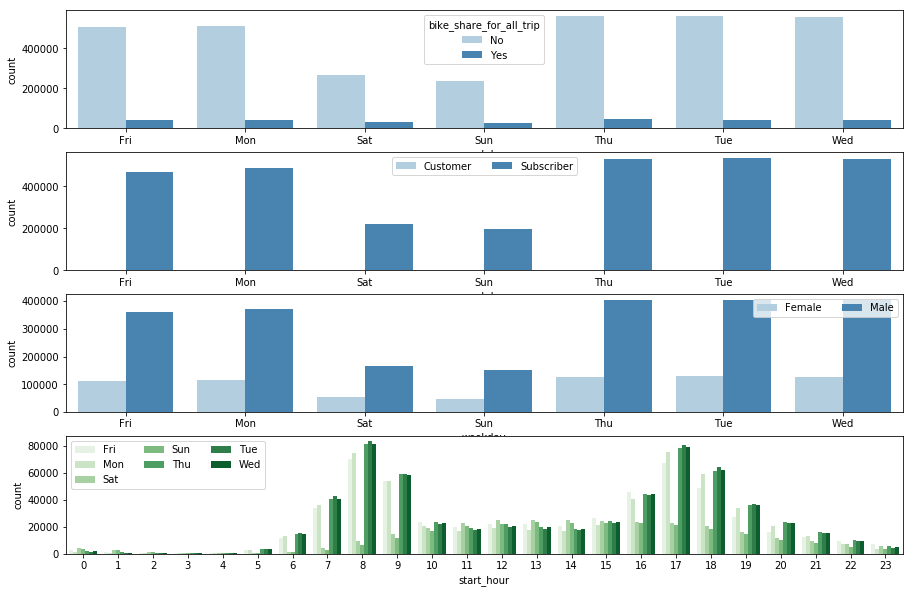

In [112]:
# subplot 1: weekday vs bike_share_for_all_trip
plt.figure(figsize = [15, 10])

plt.subplot(4, 1, 1)
sb.countplot(data = subset, x = 'weekday', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 2: weekday vs vs user type
ax = plt.subplot(4, 1, 2)
sb.countplot(data = subset_member, x = 'weekday', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: weekday vs member gender
ax = plt.subplot(4, 1, 3)
sb.countplot(data = subset_member, x = 'weekday', hue = 'member_gender', palette = 'Blues')
ax.legend(loc = 1, ncol = 3) # re-arrange legend to reduce overlapping


# subplot 4: clarity vs. color, use different color palette
ax = plt.subplot(4, 1, 4)
sb.countplot(data = subset, x = 'start_hour', hue = 'weekday', palette = 'Greens')
ax.legend(loc = 2, ncol = 3) # re-arrange legend to remove overlapping

plt.show()

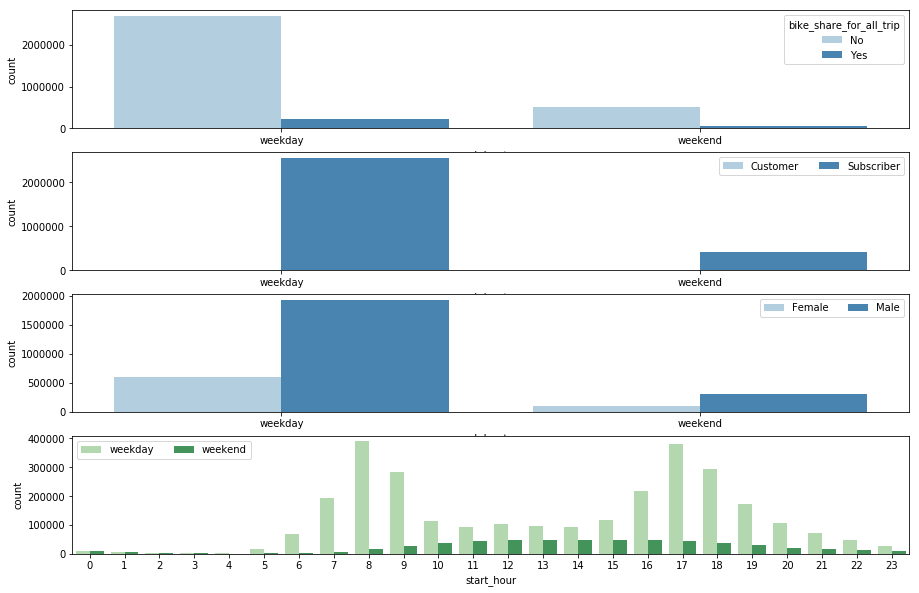

In [113]:
# see if this is same as weekday_type

# subplot 1: weekday vs bike_share_for_all_trip
plt.figure(figsize = [15,10])

plt.subplot(4, 1, 1)
sb.countplot(data = subset, x = 'weekday_type', hue = 'bike_share_for_all_trip', palette = 'Blues')

# subplot 2: weekday vs vs user type
ax = plt.subplot(4, 1, 2)
sb.countplot(data = subset_member, x = 'weekday_type', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: weekday vs member gender
ax = plt.subplot(4, 1, 3)
sb.countplot(data = subset_member, x = 'weekday_type', hue = 'member_gender', palette = 'Blues')
ax.legend(loc = 1, ncol = 3) # re-arrange legend to reduce overlapping


# subplot 4: clarity vs. color, use different color palette
ax = plt.subplot(4, 1, 4)
sb.countplot(data = subset, x = 'start_hour', hue = 'weekday_type', palette = 'Greens')
ax.legend(loc = 2, ncol = 3) # re-arrange legend to remove overlapping

plt.show()

Weekdays and weekends have different distributions of start_hour - whilst weekday start-hour has a bimodal distribution with two peak periods, weekend start-hour distribution is more centered around lunch time. On the other hand, it's not very easy to see the interaction between 1/weekday and bike_share_for_all trips, 2/weekday and member, 3/weekday and member gender. 

After the preliminary look, I want to dig further into the relationship across different variables using the full data

##### Relationship between distance and duration.

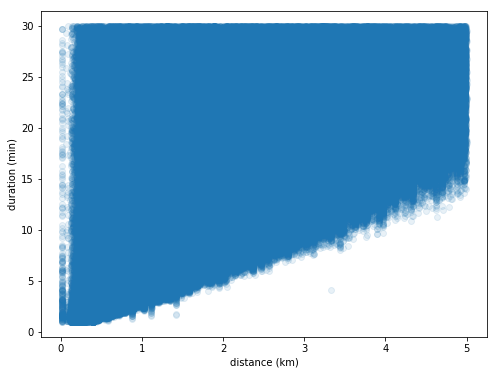

In [114]:
plt.figure(figsize = [8, 6])
plt.scatter(data = subset, x = 'distance_km', y = 'duration_min', alpha = 1/10)
plt.xlabel('distance (km)')
plt.ylabel('duration (min)')
plt.show()

Finding: duration tend to increase with distance, but longer distance doesn't always mean longer duration.

##### Impact of user_type, weekday, and start_hour on duration and distance

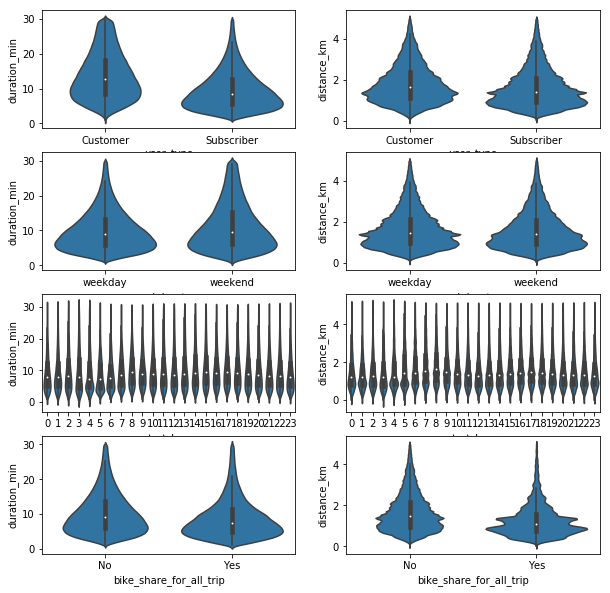

In [115]:
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [10,10])
vars_temp = ['user_type', 'weekday_type', 'start_hour', 'bike_share_for_all_trip']

for i in range(len(vars_temp)):
    var = vars_temp[i]
    sb.violinplot(data = subset, x = var, y = 'duration_min', ax = ax[i,0],
               color = base_color)
    sb.violinplot(data = subset, x= var, y = 'distance_km', ax = ax[i,1],
               color = base_color)

plt.show()

Findings: 

1. Rides by subscribers are more centred around shorter duration and distance. 
2. Rides on weekends tend to be modestly longer in duration and shorter in distance compared those made on weekdays.  
3. 7-9am and 3-6pm are the two peak usage periods by both duration and distance 
4. generally, if it's a longer ride in both distance and duration, bike share tend to be the sole travelling method. If it's a shorter ride, it tends to be part of a trip (rest part of the trip by car, and/or public transport).

##### Interaction of member_age with start_hour, gender distribution, and bike_share_for_all_trips

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


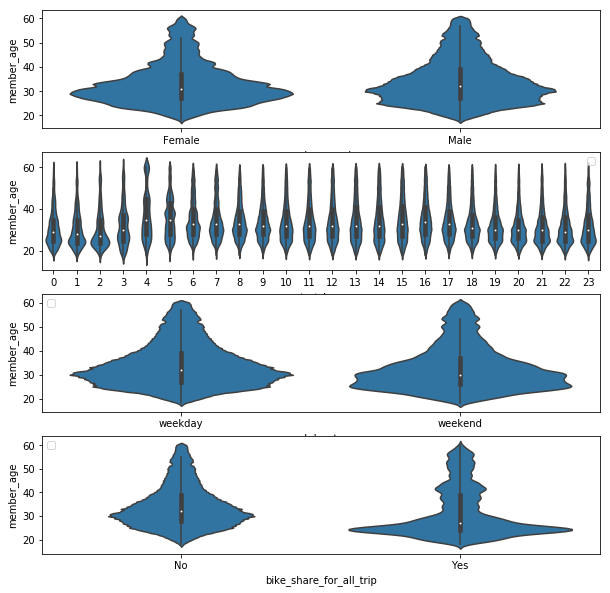

In [116]:
# interaction of member_age with member_gender
plt.figure(figsize = [10, 10])
plt.subplot(4, 1, 1)
sb.violinplot(data = subset_member, x = 'member_gender', y = 'member_age', color = base_color)

# member age vs start_hour
ax = plt.subplot(4, 1, 2)
sb.violinplot(data = subset_member, x = 'start_hour', y = 'member_age', color = base_color)
ax.legend(ncol=3)

# member age vs weekday type
ax = plt.subplot(4, 1, 3)
sb.violinplot(data = subset_member, x = 'weekday_type', y = 'member_age', color = base_color)
ax.legend(loc = 2, ncol = 3) 

# member age vs bike_share_for_all_trip
ax = plt.subplot(4, 1, 4)
sb.violinplot(data = subset_member, x = 'bike_share_for_all_trip', y = 'member_age', color = base_color)
ax.legend(loc = 2, ncol = 3) 


plt.show()

Findings:
1. Female members are mostly centred around age 30, whilst the age distribution of male members is more dispersed.
2. Older age groups (30+) are more active in early morning (4-6am) and early afternoon (3-5pm). Younger members between 20-30 are more active during the other periods.
3. Younger users are more active on weekends, whilst the older ones more active on weekdays.
4. Younger members around 25 years old more often uses bike share for the entire trip than the older ones. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Duration tends to increase with distance, but longer duration doesn't always gurantee longer distance. This makes sense - speed also plays a role here.

It comes as a surprise that ride duration and distance are shorter for subscribers than customers (non-members). But on a second thought, this makes sense - subscribers probably use bike share more often, especially for part of their trip, which coincides with our other finding, that if bike share is used for part of the trip, duration and distance are shorter. 

Weekdays and weekends also have different usage patterns:
1. Start hour distribution is different - whilst weekday start-hour has a bimodal distribution with two peak periods (7-9am and 3-6pm), weekend start-hour distribution is more centered around lunch time. 
2. Weekends see longer duration and shorter distance than weekdays - this is probably because people tend to use bike share for more leisure (and hence slower) rides over weekends.

Among subscribers, usage patterns are modestly different by gender and age group.
1. female subscribers are mostly centred around age 30, whilst the male members have a more evenly age distribution. 
2. Older age groups (30+) are more active in early morning (4-6am) and early afternoon (3-5pm). Younger members between 20-30, on the other hand, are more active during the other periods. 
3. Also, younger members around 25 years old more often uses bike share for the entire trip than the older ones. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


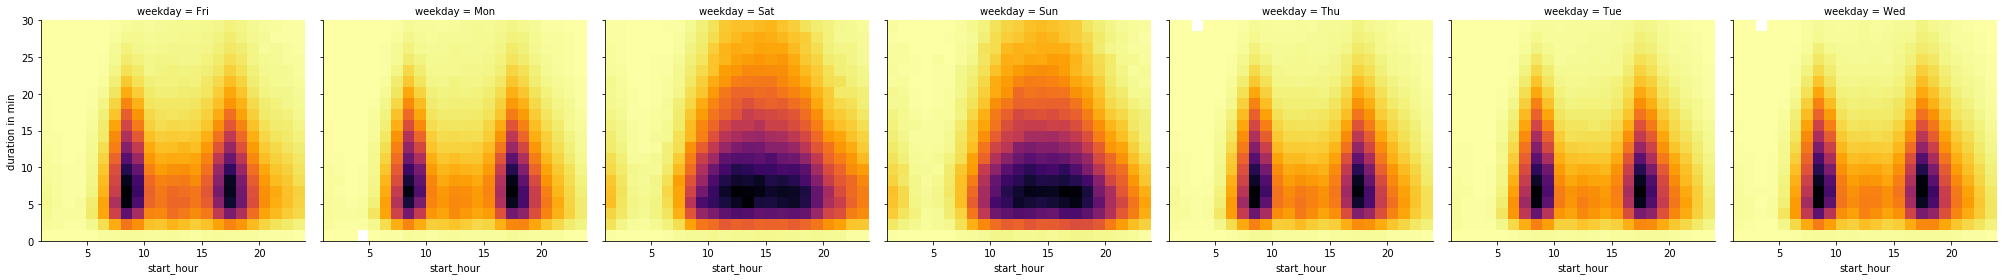

In [117]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 25, 1)
    bins_y = np.arange(0, y.max()+y.max()/20, y.max()/20)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

# create faceted heat maps on start hour, duration, and days of the week 
g = sb.FacetGrid(data = subset, col = 'weekday', col_wrap=7, size = 4)
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('duration in min')

plt.show()

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


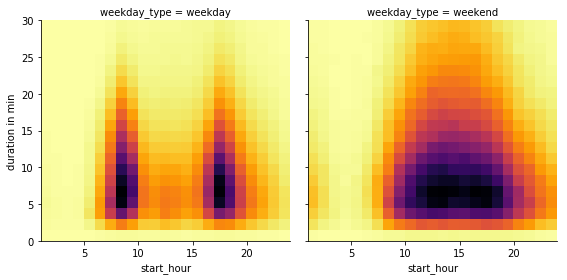

In [118]:
# create faceted heat maps on start hour, duration, and type of weekday 
g = sb.FacetGrid(data = subset, col = 'weekday_type', col_wrap=2, size = 4)
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('duration in min')

plt.show()

Finding: On weekdays, there are more rides during two peak periods (7-10am and 4-7pm), but weekends rides are normal distributed throughout the day between 7am-10pm. Duration centred between 5-10 minutes on both weekdays and weekends, but the trend for longer rides are different - longer rides happen around the two aforementioned peak periods on weekdays, and 1pm-4pm on weekends. 

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


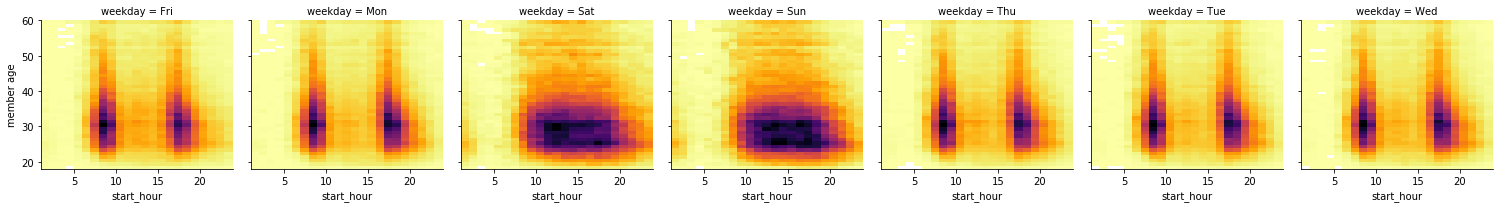

In [119]:
def hist2dgrid_age(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 25, 1)
    bins_y = np.arange(18, 61, 1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

# create faceted heat maps on start hour, duration, and days of the week 
g = sb.FacetGrid(data = subset, col = 'weekday', col_wrap=7, size = 3)
g.map(hist2dgrid_age, 'start_hour', 'member_age', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('member age')

plt.show()

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


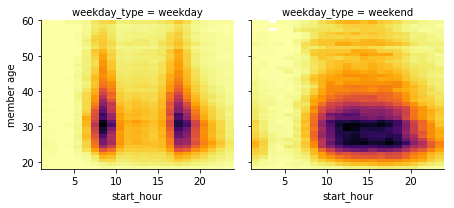

In [120]:
# chang weekday to weekday_type
g = sb.FacetGrid(data = subset, col = 'weekday_type', col_wrap=7, size = 3)
g.map(hist2dgrid_age, 'start_hour', 'member_age', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('member age')

plt.show()

Finding: weekdays, peak hour rides are taken by older adults (aged between 25-35), whilst weekends see more rides by younger adults (aged between 20-30)

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


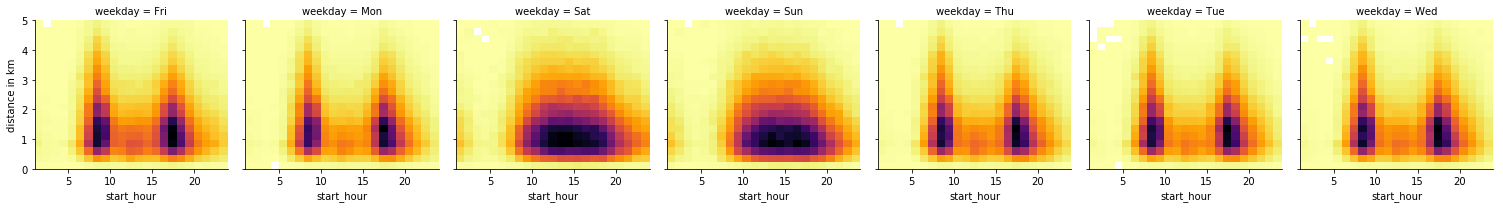

In [121]:
# create faceted heat maps on start hour, distance, and days of the week 
g = sb.FacetGrid(data = subset, col = 'weekday', col_wrap = 7, size = 3)
g.map(hist2dgrid, 'start_hour', 'distance_km', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('distance in km')

plt.show()

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


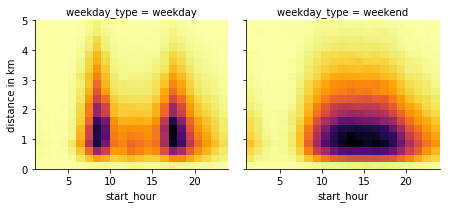

In [122]:
# chang weekday to weekday_type
g = sb.FacetGrid(data = subset, col = 'weekday_type', col_wrap = 7, size = 3)
g.map(hist2dgrid, 'start_hour', 'distance_km', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('distance in km')

plt.show()

Finding: On weekdays, there are more rides during two peak periods (7-10am and 4-7pm), but weekends rides are normal distributed throughout the day between 7am-10pm. The trend for longer rides are different - longer rides happen around the two aforementioned peak periods on weekdays, and 1pm-4pm on weekends.

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


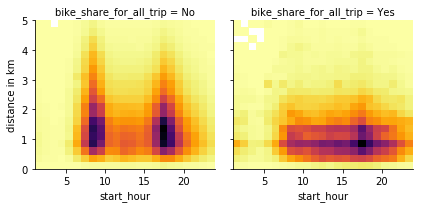

In [124]:
# create faceted heat maps on start hour, distance, and days of the week 
g = sb.FacetGrid(data = subset, col = 'bike_share_for_all_trip', col_wrap = 2, size = 3)
g.map(hist2dgrid, 'start_hour', 'distance_km', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('distance in km')

plt.show()

Finding: usage pattern is different when users use bike share for the entire trip vs only part of the trip. 

When users use bike share for only part of the trip, the behavior is similar to that on weekdays, i.e. there are two peak periods between 7-10am and 4-6pm, with more longer rides happening in those two periods. This suggests people tend to use more bike share as part of the trip during the weekdays. 

When users use bike share for the entire ride, the behavior is similar to that on weekends, although there is one less obvious peak period between 4-6pm. This implies that people are more likely choosing bike share for the entire ride, possibly for leisure purposes during the afteroon, over the weekend. On the other hand, distance is more centred between 0.5-1.5km, suggesting people are less likely to use bike share for longer rides over the weekend. This is also in line with our earlier conclusion, that people might prefer to use bike share for leisure rides over the weekend. 

C:\Users\yunhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


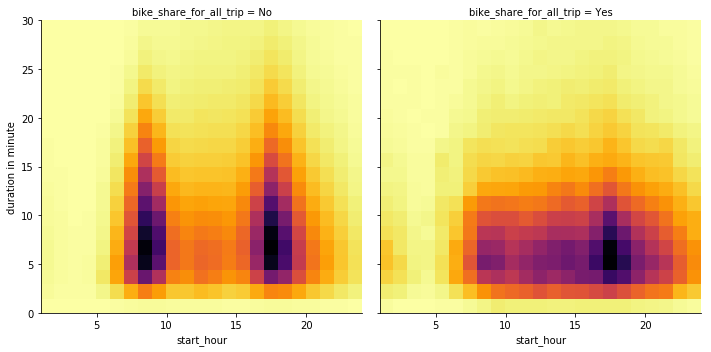

In [125]:
# create faceted heat maps on start hour, distance, and days of the week 
g = sb.FacetGrid(data = subset, col = 'bike_share_for_all_trip', col_wrap = 2, size = 5)
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r')
g.set_xlabels('start_hour')
g.set_ylabels('duration in minute')

plt.show()

Finding: usage pattern is different when users use bike share for the entire trip vs only part of the trip. 

When users use bike share for only part of the trip, the behavior is similar to that on weekdays, i.e. there are two peak periods between 7-10am and 4-6pm, with more longer rides happening in those two periods. This suggests people tend to use more bike share as part of the trip during the weekdays. 

When users use bike share for the entire ride, the behavior is similar to that on weekends, although there is one less obvious peak period between 4-6pm. This implies that people are more likely choosing bike share for the entire ride, possibly for leisure purposes during the afternoon, over the weekend. On the other hand, duration is more centred between 3-10 minutes, suggesting people are less likely to use bike share for longer rides over the weekend. This is also in line with our earlier conclusion, that people might prefer to use bike share for leisure rides over the weekend. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Usage pattern is different by type of weekdays. 
1. On weekdays, there are two peak periods between 7-10am and 4-7pm, with a greater number of rides and a larger number of longer rides by both duration and distance. 
2. On weekend, rides are normally distributed throughout the day between 7-10am, and longer rides (by both distance and duration) also happen during the peak period between 1-4pm.

In addition, there exists a similar discrepancy 1/ when users choose bike share for only part of the trip and whole trip, and 2/age group (20-30 vs 25-35), to that of the different usage patterns on weekdays and weekends. Suggesting that there might be more working age adults using bike sharing for part of the trip, possibly for commuting purposes, during weekdays.

1. on either bike share for the entire trip or part of the trip:

>a. When users use bike share for only part of the trip, the behavior is similar to that on weekdays, i.e. there are two peak periods between 7-10am and 4-6pm, with more longer rides happening in those two periods. This suggests people tend to use more bike share as part of the trip during the weekdays.

>b. When users use bike share for the entire ride, the behavior is similar to that on weekends, although there is one less obvious peak period between 4-6pm. This implies that people are more likely choosing bike share for the entire ride, possibly for leisure purposes during the afternoon, over the weekend. On the other hand, duration is more centred between 3-10 minutes, suggesting people are less likely to use bike share for longer rides over the weekend. This is also in line with our earlier conclusion, that people might prefer to use bike share for leisure rides over the weekend.

2. By age group, weekdays peak hour rides are taken by older adults (aged between 25-35), whilst weekends see more rides by younger adults (aged between 20-30)